Parameter	Description	Content type
age  	  Age in years	 integer
gender	  Male or Female integer (1 or 2)
bmi	     Body mass index float
children Number of children	 integer
smoker	Whether smoker or not	integer (0 or 1)
region	Which US region - NW, NE, SW, SE	integer (1,2,3 or 4 respectively)
charges-Annual Insurance charges in USD	float

Load the data as a pandas dataframe
Clean the data, taking care of the blank entries
Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
Develop single variable and multi variable Linear Regression models for predicting the charges
Use Ridge regression to refine the performance of Linear regression models.

IMPORTING THE MODULES

In [37]:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

READING THE CSV FILE AND CHANGING THE HEADERS INTO FOLLOWING

In [6]:
df=pd.read_csv("medical_insurance_dataset.csv",header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [7]:
headers=["age",'gender','bmi','children','smoker','region','charges']
df.columns=headers

In [8]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


DATA HANDLING BY REPLACING ANY ? LIKES THIS INTO NAN USING NUMPY

In [9]:
df.replace('?',np.nan,inplace=True)


,age,gender,bmi,children,smoker,region,charges
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229
2771,54,2,31.600,0,0,3,9850.43200


CHECKING THE INFORMATION ABOUT THE CSV AND HANDLING THE MISSING VALUES BY FOLLOWING 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2768 non-null   object 
 1   gender    2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2765 non-null   object 
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


# now filling the missing values in the age and smoker columns using mean for age and mode for the smokers

In [19]:
#replacing the missing values with the mean of the column
me=df["age"].astype(float).mean(axis=0)
df["age"].replace(np.nan, me, inplace=True)
df['age'] #since the age col is type of obj we need to convert it into int
df['age']=df["age"].astype(int)
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
2767    47
2768    21
2769    19
2770    23
2771    54
Name: age, Length: 2772, dtype: int64

In [24]:
#replacing the missing values of smokers with most frequent value
df['smoker'].value_counts().idxmax() #returns the index of the most frequent value
df['smoker'].replace(np.nan, df['smoker'].value_counts().idxmax(), inplace=True)
df["smoker"]=df["smoker"].astype(int) #converting the smoker column to int type
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
2767    0
2768    0
2769    1
2770    0
2771    0
Name: smoker, Length: 2772, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   gender    2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


# Now all missing values and data are filled 

 task 3 - EXPLORATORY DATA ANALYSIS (EDA)

(0.0, 66902.8557155)

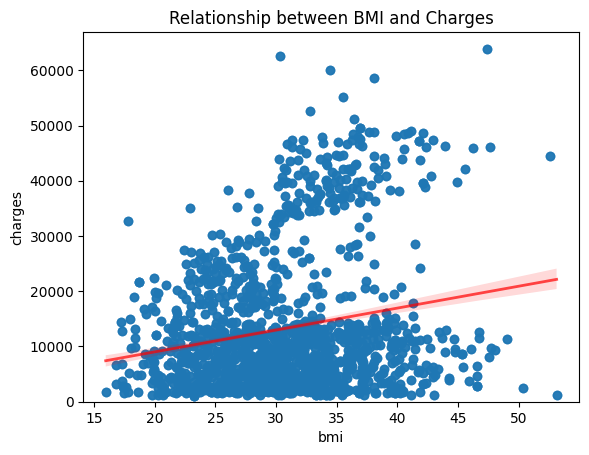

In [ ]:
#to check the relationship between bmi and charges using seaborn regression plot
sns.regplot(x="bmi",y="charges",data=df,line_kws={"color":"red","alpha":0.7,"lw":2})
plt.title("Relationship between BMI and Charges")
plt.ylim(0)

<Axes: xlabel='smoker', ylabel='charges'>

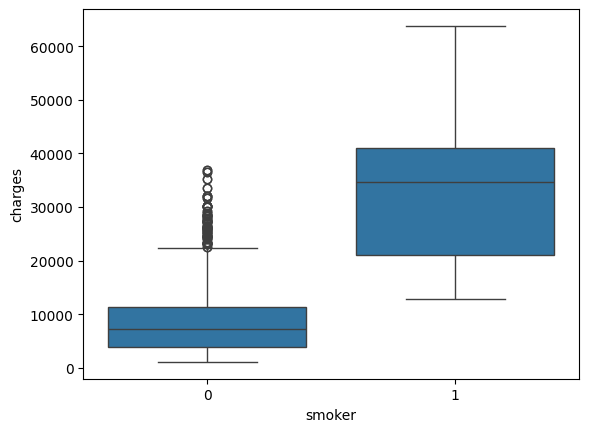

In [ ]:
#to check the relationship between smoker and charges using boxplot
sns.boxplot(x='smoker',y='charges',data=df)

In [ ]:
#correlation matrix to see the correlation between the columns
df.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


 Task 4 - Model development
Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the  R^2 score of this model.

In [39]:
x=df[["smoker"]]
y=df["charges"]
lm=LinearRegression()
lm.fit(x,y)
print(lm.score(x,y))
#splitting the data into training and testing sets

0.6221791718835359



Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R^2
 score of this model. You should see an improvement in the performance.

In [44]:
# definition of Y and lm remain same as used in last cell. 
z= df[["age", "gender", "bmi", "children", "smoker", "region"]]
lm.fit(z,y)
print(lm.score(z,y))

0.7504083816310174


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [45]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))

0.8452576157336337



Task 5 : Model Refinement
Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing

In [46]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(z,y, test_size=0.2, random_state=1)


Initialize a Ridge regressor that used hyperparameter alpha=0.1 
. Fit the model using training data data subset. Print the  R^2
 score for the testing data.

In [47]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807753399254


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the  R^2
 score for the testing subset

In [48]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631069813791
